In [1]:
import random
from kaggle_environments import make, evaluate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


termcolor not installed, skipping dependency
No pygame installed, ignoring import
Loading environment lux_ai_s3 failed: No module named 'chex'


In [2]:
# 1. Всегда "камень"
def rock_agent(observation, configuration):
    return 0

# 2. Всегда "бумага"
def paper_agent(observation, configuration):
    return 1

# 3. Всегда "ножницы"
def scissors_agent(observation, configuration):
    return 2

# 4. Случайный выбор
def random_agent(observation, configuration):
    return random.randint(0, configuration.signs - 1)

# 5. Копирование предыдущего хода соперника
def copy_opponent_agent(observation, configuration):
    if observation.step > 0:
        return observation.lastOpponentAction
    else:
        return random.randint(0, configuration.signs - 1)

# 6. Играет против предыдущего хода соперника
def counter_opponent_agent(observation, configuration):
    if observation.step > 0:
        return (observation.lastOpponentAction + 1) % configuration.signs
    else:
        return random.randint(0, configuration.signs - 1)

# 7. Циклическая стратегия
def cyclic_agent(observation, configuration):
    return observation.step % configuration.signs

# 8. Агент, повторяющий ход соперника с задержкой в 1 раунд
def mirror_agent(observation, configuration):
    if observation.step > 1:
        return observation.lastOpponentAction
    else:
        return random.randint(0, configuration.signs - 1)

# 9. Агент, который старается избегать "бумаги"
def anti_paper_agent(observation, configuration):
    # Ставит камень или ножницы, чтобы избежать бумаги
    return random.choice([0, 2])  # Камень или ножницы

# 10. Агент, который избегает "ножниц"
def anti_scissors_agent(observation, configuration):
    # Ставит бумагу или камень, чтобы избежать ножниц
    return random.choice([0, 1])  # Камень или бумага

# 11. Агент, который избегает "камня"
def anti_rock_agent(observation, configuration):
    # Ставит ножницы или бумагу, чтобы избежать камня
    return random.choice([1, 2])  # Бумага или ножницы

# 12. Агент, который чередует "камень" и "бумагу"
def rock_paper_agent(observation, configuration):
    return observation.step % 2  # Чередует 0 (камень) и 1 (бумага)

# 13. Агент, который чередует "ножницы" и "бумагу"
def scissors_paper_agent(observation, configuration):
    return (observation.step % 2) + 1  # Чередует 1 (бумага) и 2 (ножницы)

# 14. Агент, выбирающий ход, который чаще всего побеждает
def most_winning_agent(observation, configuration):
    if observation.step > 0:
        return (observation.lastOpponentAction + 1) % configuration.signs
    else:
        return 0

# 15. Агент, предсказывающий цикличность соперника
def anti_cyclic_agent(observation, configuration):
    if observation.step > 0:
        return (observation.lastOpponentAction + 1) % configuration.signs
    else:
        return random.randint(0, configuration.signs - 1)

In [3]:
# Создаем среду
env = make("rps", debug=True)

# Список агентов
agents = {
    "Rock Agent": rock_agent,
    "Paper Agent": paper_agent,
    "Scissors Agent": scissors_agent,
    "Random Agent": random_agent,
    "Copy Opponent": copy_opponent_agent,
    "Counter Opponent": counter_opponent_agent,
    "Cyclic Agent": cyclic_agent,
    "Mirror Agent": mirror_agent,
    "Anti Paper": anti_paper_agent,
    "Anti Scissors": anti_scissors_agent,
    "Anti Rock": anti_rock_agent,
    "Rock Paper": rock_paper_agent,
    "Scissors Paper": scissors_paper_agent,
    "Most Winning": most_winning_agent,
    "Anti Cyclic": anti_cyclic_agent,
}
# Хранение результатов
results = []

# Турнир между агентами
for agent1_name, agent1 in agents.items():
    for agent2_name, agent2 in agents.items():
        if agent1_name != agent2_name:
            # Запуск 100 игр между агентами
            score = evaluate(
                "rps",
                [agent1, agent2],
                configuration={"episodeSteps": 100}
            )
            results.append({
                "Agent 1": agent1_name,
                "Agent 2": agent2_name,
                "Agent 1 Score": score[0][0],
                "Agent 2 Score": score[0][1],
            })


         Agent 1           Agent 2  Agent 1 Score  Agent 2 Score
0     Rock Agent       Paper Agent          -99.0           99.0
1     Rock Agent    Scissors Agent           99.0          -99.0
2     Rock Agent      Random Agent            0.0            0.0
3     Rock Agent     Copy Opponent            0.0            0.0
4     Rock Agent  Counter Opponent          -97.0           97.0
..           ...               ...            ...            ...
205  Anti Cyclic     Anti Scissors           24.0          -24.0
206  Anti Cyclic         Anti Rock            0.0            0.0
207  Anti Cyclic        Rock Paper          -49.0           49.0
208  Anti Cyclic    Scissors Paper          -50.0           50.0
209  Anti Cyclic      Most Winning            0.0            0.0

[210 rows x 4 columns]


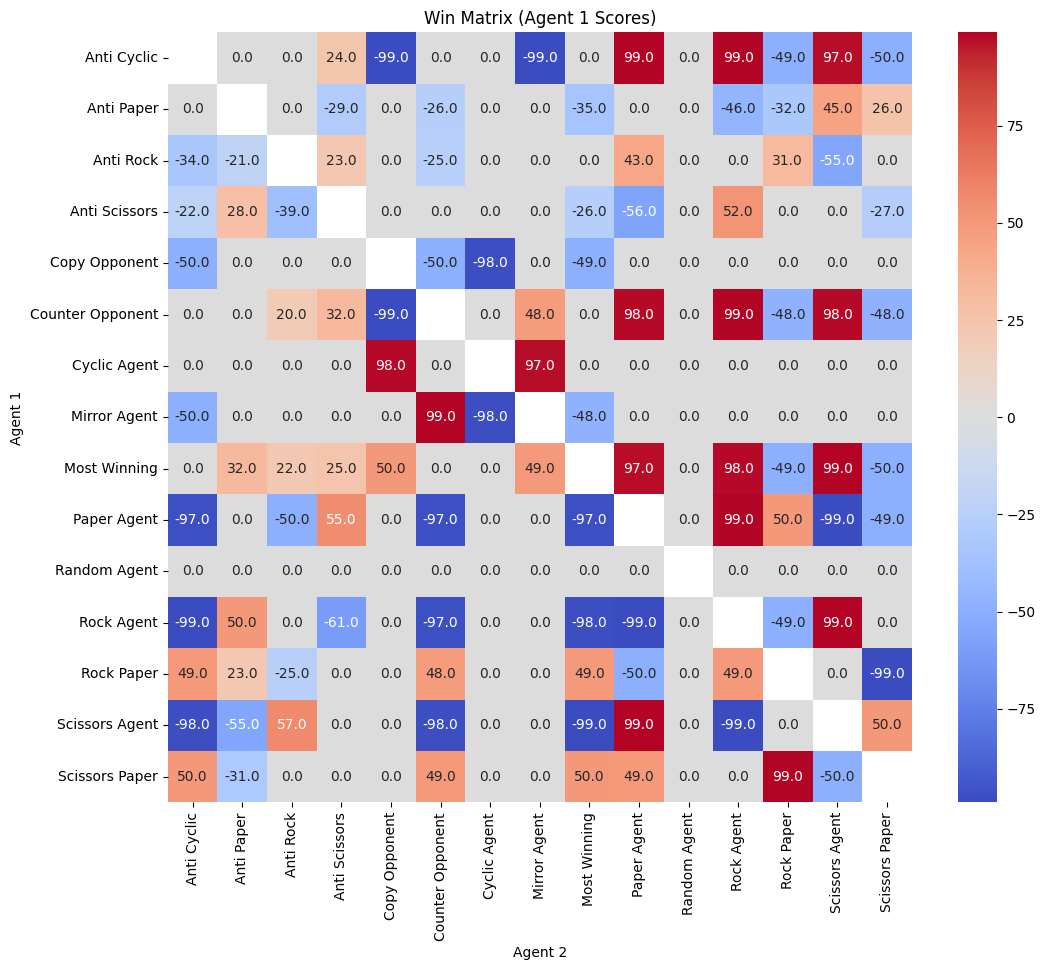

In [4]:
results_df = pd.DataFrame(results)
print(results_df)

# Сохранение результатов
results_df.to_csv("tournament_results.csv", index=False)


# ===== Визуализация =====

# Создание матрицы выигрышей
pivot_results = results_df.pivot(index="Agent 1", columns="Agent 2", values="Agent 1 Score")

# Построение тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_results, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Win Matrix (Agent 1 Scores)")
plt.show()